In [120]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import os
import sys

sys.path.insert(0, os.getenv("HOME") + "/pycode/MscThesis/")
# sys.path.insert(0,r'C:\Users\coren\Documents\PhD\Code\AMFtrack')


import pandas as pd
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    get_current_folders,
    get_folders_by_plate_id,
)


import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    sparse_to_doc,
)
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
)
from amftrack.pipeline.paths.directory import (
    run_parallel_transfer,
    find_state,
    directory_scratch,
    directory_project,
    directory_archive,
)
import dropbox
from amftrack.transfer.functions.transfer import upload, zip_file, sync_fold
from subprocess import call
from tqdm.autonotebook import tqdm
from time import time_ns
import subprocess
import matplotlib as mpl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
directory = r"/run/user/357100554/gvfs/smb-share:server=sun.amolf.nl,share=shimizu-data,user=bisot/home-folder/oyartegalvez/Drive_AMFtopology/Healing/"
directory = r"/run/user/357100554/gvfs/smb-share:server=prince.amolf.nl,share=d$/Data/Prince/Images/"
directory = r"/run/user/357100554/gvfs/smb-share:server=sun.amolf.nl,share=shimizu-data,user=bisot/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE_sync/"
directory = r"/mnt/sun/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE_sync_test/"
directory = r"/mnt/sun/home-folder/oyartegalvez/Drive_AMFtopology/PRINCE_analysis/"
directory = r"/mnt/sun-temp/TEMP/Myristate/"
# directory = r'/mnt/sun-temp/TEMP/Transport/'
directory = r"/mnt/sun/home-folder/Jaap/plates/"
directory = r"/mnt/sun-temp/TEMP/PRINCE_syncing/"

update_plate_info(directory)
all_folders = get_current_folders(directory)
folders = all_folders
len(folders)

analysed:   0%|          | 0/1241 [00:00<?, ?it/s]

1241

In [116]:
folders

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,Temperature,...,/Analysis/skeleton_masked_compressed.mat,/Analysis/skeleton_pruned_compressed.mat,/Analysis/transform.mat,/Analysis/transform_corrupt.mat,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder
1460,/mnt/sun/home-folder/Jaap/plates/20220325_1428...,Jaap,19,'Carrot','C2','001P100N100C','Y','-',20220101,30,...,False,False,False,False,False,False,False,False,"25.03.2022, 14:28:",20220325_1428_Plate19


In [122]:
folders = all_folders.loc[all_folders["folder"] == "20220331_0111_Plate04"]

In [108]:
folders = all_folders.loc[all_folders["/Img/TileConfiguration.txt.registered"] == True]

In [109]:
folders

,total_path,Plate,PrincePos,root,strain,medium,split,Pbait,CrossDate,/Img/TileConfiguration.txt.registered,...,/Analysis/skeleton_realigned_compressed.mat,/Analysis/nx_graph_pruned.p,/Analysis/nx_graph_pruned_width.p,/Analysis/nx_graph_pruned_labeled.p,date,folder,Temp,Temperature,InocDate,Innoc
30960,/mnt/sun-temp/TEMP/Myristate/20220317_1209_Myr...,09,00,'Carrot','A5','0mM','N','-',NaN,True,...,False,False,False,False,"17.03.2022, 12:09:",20220317_1209_Myristate00mM_A5_Plate09,25,NaN,20220209,NaN
30961,/mnt/sun-temp/TEMP/Myristate/20220317_1115_Myr...,05,00,'Carrot','A5','0mM','N','-',NaN,True,...,False,False,False,False,"17.03.2022, 11:15:",20220317_1115_Myristate00mM_A5_Plate05,25,NaN,20220209,NaN
30962,/mnt/sun-temp/TEMP/Myristate/20220317_1150_Myr...,07,00,'Carrot','A5','0mM','N','-',NaN,True,...,False,False,False,False,"17.03.2022, 11:50:",20220317_1150_Myristate00mM_A5_Plate07,25,NaN,20220209,NaN
30963,/mnt/sun-temp/TEMP/Myristate/20220317_1013_Myr...,01,00,'Carrot','A5','0mM','N','-',NaN,True,...,False,False,False,False,"17.03.2022, 10:13:",20220317_1013_Myristate00mM_A5_Plate01,25,NaN,20220209,NaN
30966,/mnt/sun-temp/TEMP/Myristate/20220317_1049_Myr...,02,00,'Carrot','A5','0mM','N','-',NaN,True,...,False,False,False,False,"17.03.2022, 10:49:",20220317_1049_Myristate00mM_A5_Plate02,25,NaN,20220209,NaN
30967,/mnt/sun-temp/TEMP/Myristate/20220317_1109_Myr...,04,00,'Carrot','A5','0mM','N','-',NaN,True,...,False,False,False,False,"17.03.2022, 11:09:",20220317_1109_Myristate00mM_A5_Plate04,25,NaN,20220209,NaN
30968,/mnt/sun-temp/TEMP/Myristate/20220317_1058_Myr...,03,00,'Carrot','A5','0mM','N','-',NaN,True,...,False,False,False,False,"17.03.2022, 10:58:",20220317_1058_Myristate00mM_A5_Plate03,25,NaN,20220209,NaN
30975,/mnt/sun-temp/TEMP/Myristate/20220317_1135_Myr...,06,00,'Carrot','A5','0mM','N','-',NaN,True,...,False,False,False,False,"17.03.2022, 11:35:",20220317_1135_Myristate00mM_A5_Plate06,25,NaN,20220209,NaN
30976,/mnt/sun-temp/TEMP/Myristate/20220317_1159_Myr...,08,00,'Carrot','A5','0mM','N','-',NaN,True,...,False,False,False,False,"17.03.2022, 11:59:",20220317_1159_Myristate00mM_A5_Plate08,25,NaN,20220209,NaN
30977,/mnt/sun-temp/TEMP/Myristate/20220317_1214_Myr...,10,00,'Carrot','A5','0mM','N','-',NaN,True,...,False,False,False,False,"17.03.2022, 12:14:",20220317_1214_Myristate00mM_A5_Plate10,25,NaN,20220209,NaN


In [123]:
path_code = os.getenv("HOME") + "/pycode/MscThesis/"


def make_stitching_loop(directory, dirname, op_id):
    a_file = open(
        f"{path_code}amftrack/pipeline/scripts/stitching_loops/stitching_loop.ijm", "r"
    )

    list_of_lines = a_file.readlines()

    list_of_lines[4] = f"mainDirectory = \u0022{directory}\u0022 ;\n"
    list_of_lines[29] = f"\t if(startsWith(list[i],\u0022{dirname}\u0022)) \u007b\n"
    file_name = f'{os.getenv("TEMP")}/stitching_loops/stitching_loop{op_id}.ijm'
    a_file = open(file_name, "w")

    a_file.writelines(list_of_lines)

    a_file.close()


def run_stitch(directory, folders):
    folder_list = list(folders["folder"])
    folder_list.sort()
    with tqdm(total=len(folder_list), desc="stitched") as pbar:
        for folder in folder_list:
            op_id = time_ns()
            im = imageio.imread(f"{directory}/{folder}/Img/Img_r03_c05.tif")
            for x in range(1, 11):
                for y in range(1, 16):
                    strix = str(x) if x >= 10 else f"0{x}"
                    striy = str(y) if y >= 10 else f"0{y}"
                    path = f"{directory}/{folder}/Img/Img_r{strix}_c{striy}.tif"
                    # print(striy,path,os.path.getsize(path))
                    if not os.path.isfile(path):
                        f = open(path, "w")
                    if os.path.getsize(path) == 0:
                        imageio.imwrite(path, im * 0)
            make_stitching_loop(directory, folder, op_id)
            command = [
                os.getenv("HOME") + "/Fiji.app/ImageJ-linux64",
                "--mem=8000m",
                "--headless",
                "--ij2",
                "--console",
                "-macro",
                f'{os.getenv("TEMP")}/stitching_loops/stitching_loop{op_id}.ijm',
            ]
            print(" ".join(command))
            process = subprocess.run(command)
            pbar.update(1)


def run_parallel(code, args, folders):
    op_id = time_ns()
    folders.to_json(f'{os.getenv("TEMP")}/{op_id}.json')  # temporary file
    folder_list = list(folders["folder"])
    folder_list.sort()
    args_str = [str(arg) for arg in args]
    arg_str = " ".join(args_str)
    with tqdm(total=len(folder_list), desc="stitched") as pbar:
        for index, folder in enumerate(folder_list):
            command = (
                [
                    "python",
                    f"{path_code}amftrack/pipeline/scripts/image_processing/{code}",
                ]
                + args_str
                + [f"{op_id}", f"{index}"]
            )
            print(" ".join(command))
            process = subprocess.run(command)
            pbar.update(1)

In [124]:
run_stitch(directory, folders)

stitched:   0%|          | 0/1 [00:00<?, ?it/s]

/home/ipausers/bisot/Fiji.app/ImageJ-linux64 --mem=8000m --headless --ij2 --console -macro /home/ipausers/bisot/temp//stitching_loops/stitching_loop1648826622463101094.ijm


Java HotSpot(TM) 64-Bit Server VM warning: ignoring option PermSize=128m; support was removed in 8.0
Java HotSpot(TM) 64-Bit Server VM warning: Using incremental CMS is deprecated and will likely be removed in a future release


20220331_0111_Plate04/
(Fri Apr 01 17:26:21 CEST 2022): Stitching the following files:
Image: '/mnt/sun-temp/TEMP/PRINCE_syncing//20220331_0111_Plate04//Img2/Img_r01_c01.tif' Imp: 'null' Offset: (0.0, 0.0)
Image: '/mnt/sun-temp/TEMP/PRINCE_syncing//20220331_0111_Plate04//Img2/Img_r01_c02.tif' Imp: 'null' Offset: (3276.0, 0.0)
Image: '/mnt/sun-temp/TEMP/PRINCE_syncing//20220331_0111_Plate04//Img2/Img_r01_c03.tif' Imp: 'null' Offset: (6552.0, 0.0)
Image: '/mnt/sun-temp/TEMP/PRINCE_syncing//20220331_0111_Plate04//Img2/Img_r01_c04.tif' Imp: 'null' Offset: (9828.0, 0.0)
Image: '/mnt/sun-temp/TEMP/PRINCE_syncing//20220331_0111_Plate04//Img2/Img_r01_c05.tif' Imp: 'null' Offset: (13104.0, 0.0)
Image: '/mnt/sun-temp/TEMP/PRINCE_syncing//20220331_0111_Plate04//Img2/Img_r01_c06.tif' Imp: 'null' Offset: (16380.0, 0.0)
Image: '/mnt/sun-temp/TEMP/PRINCE_syncing//20220331_0111_Plate04//Img2/Img_r01_c07.tif' Imp: 'null' Offset: (19656.0, 0.0)
Image: '/mnt/sun-temp/TEMP/PRINCE_syncing//20220331_0111_Pl

In [ ]:
imageio.imsave()

In [119]:
args = [directory]
run_parallel("compress_image.py", args, folders)

stitched:   0%|          | 0/1 [00:00<?, ?it/s]

python /home/ipausers/bisot/pycode/MscThesis/amftrack/pipeline/scripts/image_processing/compress_image.py /mnt/sun/home-folder/Jaap/plates/ 1648470878066964959 0
Directory  /mnt/sun/home-folder/Jaap/plates/20220325_1428_Plate19/Analysis  already exists


In [ ]:
time = "3:00:00"
low = 30
high = 80
extend = 30
args = [low, high, extend, directory]
run_parallel("extract_skel.py", args, folders)

In [104]:
# select = all_folders.loc[(all_folders['folder'].isin([ '20210929_0308_Plate21',
#  '20210929_0912_Plate21']))]
select = folders
folder_list = list(select["total_path"])
folder_list.sort()
skels = []
ims = []
kernel = np.ones((5, 5), np.uint8)
itera = 1
start = 0

# start = choice(range(len(folder_list)))
finish = start + 2
for folder in folder_list[start:finish]:
    # print(folder)
    path_snap = folder
    skel_info = read_mat(path_snap + "/Analysis/skeleton_compressed.mat")
    skel = skel_info["skeleton"]
    skels.append(cv2.dilate(skel.astype(np.uint8), kernel, iterations=itera))
    im = read_mat(path_snap + "/Analysis/raw_image.mat")["raw"]
    #     im = imageio.imread(path_snap+'/StitchedImage.tif')
    #     im = cv2.resize(im,(skel.shape[1],skel.shape[0]))
    #     M = np.float32([
    # 	[1, 0, 0],
    # 	[0, 1, -117]])
    #     im = cv2.warpAffine(im,M,(im.shape[1], im.shape[0]))
    ims.append(im)

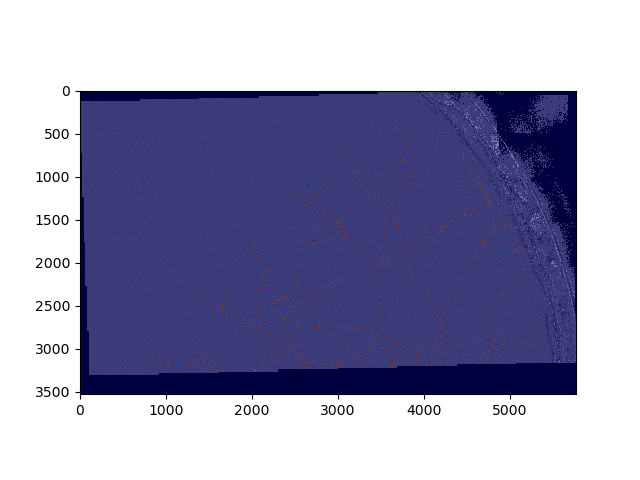

In [106]:
plt.close("all")
start = 0
finish = start + 1
for i in range(start, finish):
    plot_t_tp1([], [], None, None, skels[i], ims[i])